Importing the Dependencies

# Project Problem Statement: Customer Segmentation Using K-Means and DBSCAN Clustering

**Background & Motivation:**
Customer segmentation is a crucial process in marketing and business strategy, allowing companies to understand and categorize their customers based on purchasing behavior, demographics, and spending patterns. Traditional segmentation techniques often rely on predefined categories, but machine learning techniques like K-Means and DBSCAN provide data-driven segmentation that can uncover hidden patterns.

**Problem Statement:**
The goal of this project is to implement and compare two clustering techniques, K-Means and DBSCAN, for customer segmentation based on spending patterns and annual income. The primary challenges include:

Identifying optimal customer groups that can help businesses tailor their marketing strategies.

Evaluating the effectiveness of K-Means vs. DBSCAN in segmenting customers.

Detecting outliers (anomalous customers) who do not fit into standard spending patterns.

Assessing the clustering performance using metrics like Silhouette Score and visualizations.

**Project Scope:**

Dataset: The project utilizes customer data of a mall containing attributes such as Gender,Age,	Annual Income and Spending Score.

**Clustering Methods**:
K-Means Clustering (suitable for well-separated clusters)
DBSCAN Clustering (capable of detecting outliers and irregularly shaped clusters)

**Evaluation Metrics:**
Silhouette Score for measuring clustering quality.
Visualization techniques to interpret customer segments.

**Business Insights**:
Understanding different customer groups based on spending behavior.
Identifying potential high-value customers and budget-conscious consumers.
Developing targeted marketing strategies based on segmented groups.

**Expected Outcomes:**
A well-defined customer segmentation model using K-Means and DBSCAN.

Comparative analysis of clustering performance and business implications.

Recommendations for businesses to leverage customer segmentation insights for marketing and product positioning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the Annual Income Column & Spending Score column

In [8]:
X = customer_data.iloc[:,[3,4]].values

In [9]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [10]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

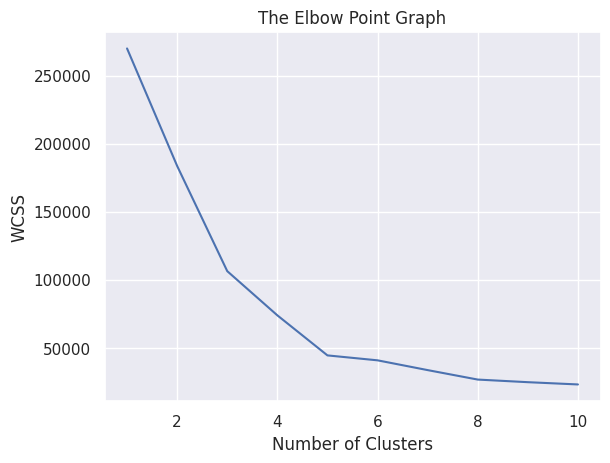

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Upon closely analyzing the Elbow Method graph, the optimal number of clusters appears to be **3 or 5**.

Reasoning:
The elbow point is where the Within-Cluster Sum of Squares (WCSS) starts to level off significantly.
The first **noticeable drop in WCSS occurs at K = 3**, which suggests that three clusters provide a** significant reduction in variance**.
However, there is **another noticeable bend around K = 5**, indicating that adding two more clusters might provide **a better segmentation without excessive complexity.**
Beyond K = 5, the reduction in WCSS becomes less significant, implying that additional clusters do not contribute substantially to improved clustering.
Final Conclusion:
The optimal number of clusters is likely either 3 or 5, depending on the level of granularity required. If a **more generalized segmentation is preferred, K = 3** is suitable. If **finer segmentation is necessary, K = 5** may be a better choice.

# **Training the k-Means Clustering Model**

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters -  0, 1, 2, 3, 4

# **Visualizing all the Clusters**

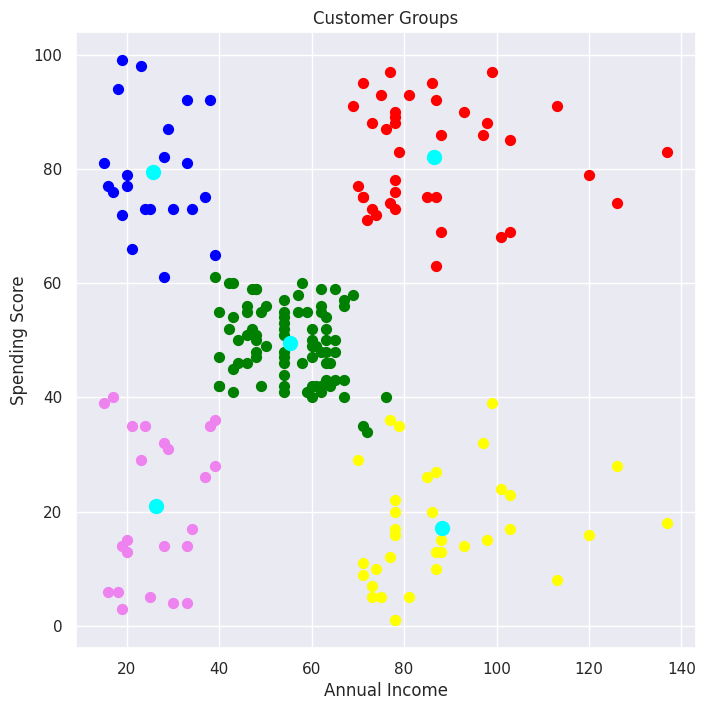

In [13]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# **Final Conclusion from the K-Means Clustering Visualization:**
The scatter plot represents the segmentation of customers based on Annual Income and Spending Score, using K-Means clustering with five clusters. The analysis suggests the following customer groups:

**High Income - High Spending (Red Cluster)**
: Customers with high annual income and high spending score.
These are the premium customers who spend significantly despite having a high income.
Marketing Strategy: Focus on loyalty programs, premium product recommendations, and exclusive offers.

**Low Income - High Spending (Blue Cluster**)
:Customers with low income but high spending score.
Likely to be young customers or brand-loyal shoppers who prioritize spending despite limited earnings.
Marketing Strategy: Attract with discounts, installment plans, and budget-friendly product bundles.

**Mid Income - Average Spending (Green Cluster)**:
Customers with mid-range income and average spending score.
Represents a balanced segment that spends cautiously based on income.
Marketing Strategy: Targeted promotions based on past purchase behavior and seasonal offers.

**High Income - Low Spending (Yellow Cluster)**
:Customers with high income but low spending score.
May prefer saving over spending or need incentives to increase their spending.
Marketing Strategy: Personalized deals, premium product trials, and membership discounts.

**Low Income - Low Spending (Purple Cluster)**:
Customers with low income and low spending score.
These customers have limited purchasing power and engage minimally.
Marketing Strategy: Engage through budget-friendly options, referral programs, and small-ticket purchases.



# **Business Insights:**
The **red** and blue clusters are the most valuable in terms of spending behavior.
The **yellow cluster presents an opportunity**—these customers have money but need incentives to spend.
The **green cluster represents a stable market**, while the **purple cluster is the least engaged.**

In [14]:
# Import necessary libraries
from sklearn.metrics import silhouette_score

# Assuming X is the dataset used for clustering
# Fit KMeans with 5 clusters (as per the visualization)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

# Compute the Silhouette Score
silhouette_avg = silhouette_score(X, Y)
silhouette_avg


0.553931997444648

**A Silhouette Score of 0.55 indicates a moderately good clustering performance**

Moderate clustering quality → The clusters are reasonably well-defined but may have some overlap.
There is some separation between clusters, but a few data points might be closer to multiple clusters, making them harder to classify.
This is a **decent Silhouette Score for real-world clustering**, but there might still be room for improvement.

The Silhouette Score ranges from -1 to 1:

1 → Clusters are well-separated and compact.

0 → Clusters are overlapping, meaning they are not well-separated.

Negative values → Some points may be assigned to the wrong clusters.

Silhouette Score for DBSCAN: 0.31614121976731185


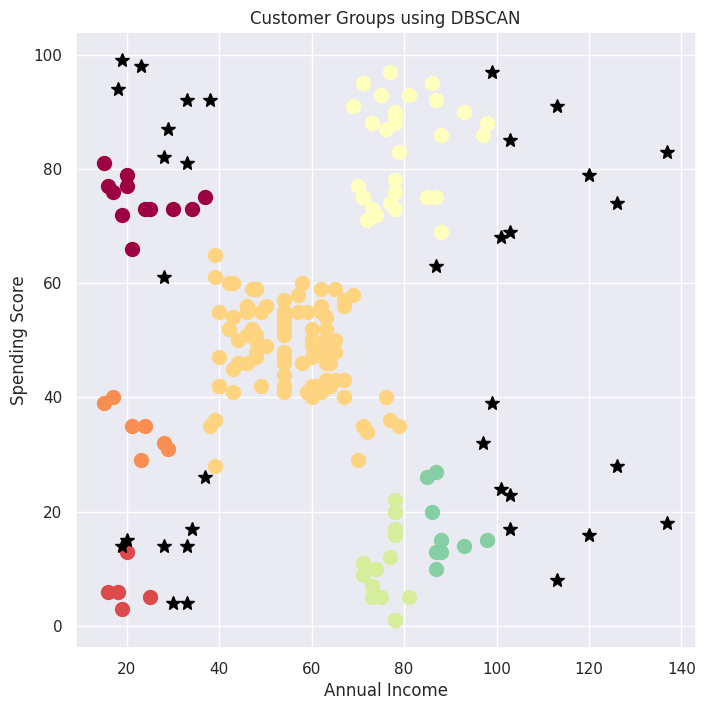

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Feature Scaling (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Experiment with different eps and min_samples values
# Adjusted parameters to potentially create more clusters
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjusted values

# Fit the model to the scaled data
Y_dbscan = dbscan.fit_predict(X_scaled)

# Check the number of unique cluster labels (excluding noise -1)
n_clusters = len(set(Y_dbscan)) - (1 if -1 in Y_dbscan else 0)

# Evaluating the clustering using the silhouette score if n_clusters > 1
if n_clusters > 1:
    silhouette_avg_dbscan = silhouette_score(X_scaled, Y_dbscan)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("DBSCAN resulted in only one cluster or all noise. Silhouette Score cannot be calculated.")



# Visualizing the clusters
plt.figure(figsize=(8,8))
unique_labels = set(Y_dbscan)
for label in unique_labels:
    if label == -1: # Mark outliers with black color
      color = 'black'  # Keep 'black' as a string
      marker = '*'
    else:
      color = plt.cm.Spectral(label / len(unique_labels)) #Assign color based on cluster ID
      marker = 'o'

    class_member_mask = (Y_dbscan == label)
    # core_samples_mask is not defined, using class_member_mask instead.
    xy = X[class_member_mask]
    # Pass color directly to markerfacecolor and markeredgecolor if it's a string
    # Otherwise, convert it to a tuple as before
    plt.plot(xy[:, 0], xy[:, 1], marker,
             markerfacecolor=color if isinstance(color, str) else tuple(color),
             markeredgecolor=color if isinstance(color, str) else tuple(color),
             markersize=10)

plt.title('Customer Groups using DBSCAN')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# **Final Conclusion from DBSCAN Clustering Visualization (Silhouette Score: 0.32)**

Observations from the DBSCAN Clustering:
Core Clusters Identified:

The visualization shows multiple color-coded clusters, indicating that DBSCAN successfully grouped densely packed customer segments.
The** black stars represent outliers/noise points that were not assigned to any cluster.**
Presence of Outliers:

Unlike K-Means,** DBSCAN is effective at identifying outliers**, as seen in the black star-marked data points.

These could represent unusual customer behaviors, such as:
High-income individuals with erratic spending.
Low-income individuals making occasional large purchases.
Lower Silhouette Score (0.32):

**A silhouette score of 0.32 suggests weaker clustering quality than K-Means (which had 0.55).**

The lower score may indicate overlapping clusters, or DBSCAN struggling to differentiate distinct customer segments effectively.

Comparison with K-Means:
**K-Means (Silhouette Score: 0.55)**

Formed well-separated, compact clusters.
No explicit handling of outliers.
Performed well in segmenting customers based on spending patterns.

**DBSCAN (Silhouette Score: 0.32)**

Successfully detected outliers.
Formed irregularly shaped clusters, which may be more realistic but less clearly separated.
Struggled with overlapping data points, reducing clustering quality.


## **Final Verdict:**
If outlier detection is important, DBSCAN is useful.
If compact and well-defined clusters are preferred, K-Means is the better choice.

